# Predicción y Evaluación del Modelo

En este notebook, evaluaremos el modelo de perceptrón multicapa entrenado utilizando el conjunto de datos de prueba.

## 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys
import os

# Configurar visualización
plt.style.use('ggplot')
%matplotlib inline

# Añadir el directorio raíz al PATH para poder importar módulos personalizados
sys.path.append(os.path.abspath('../'))

# Importar funciones propias
from utils.neural_network_functions import NeuralNetwork, calculate_accuracy, binary_crossentropy
from utils.evaluation_functions import (
    confusion_matrix, precision_score, recall_score, f1_score,
    plot_confusion_matrix, plot_prediction_distribution, 
    plot_misclassified_examples, evaluate_binary_classifier
)

Cargando el modelo entrenado...
Modelo cargado desde ../output/models/trained_model.json

Información del modelo:
Arquitectura: 30 inputs, [25, 25] neuronas por capa oculta, 1 outputs
Accuracy final en entrenamiento: 0.9715
Accuracy final en validación: 0.9469

Cargando datos de prueba...
Forma de los datos de prueba: X_test (113, 30), y_test (113, 1)

Realizando predicciones...

Algunas predicciones (probabilidad y clase predicha):
   Probabilidad  Predicción  Real
0        0.9328           1     1
1        0.8396           1     1
2        0.5380           1     1
3        0.9197           1     1
4        0.9359           1     1
5        0.8813           1     1
6        0.7601           1     1
7        0.9397           1     1
8        0.9230           1     1
9        0.0529           0     0

=== Métricas de Evaluación ===
Accuracy: 0.9469
Loss (Binary Crossentropy): 0.1937
Precision: 0.9286
Recall: 0.9286
F1-Score: 0.9286


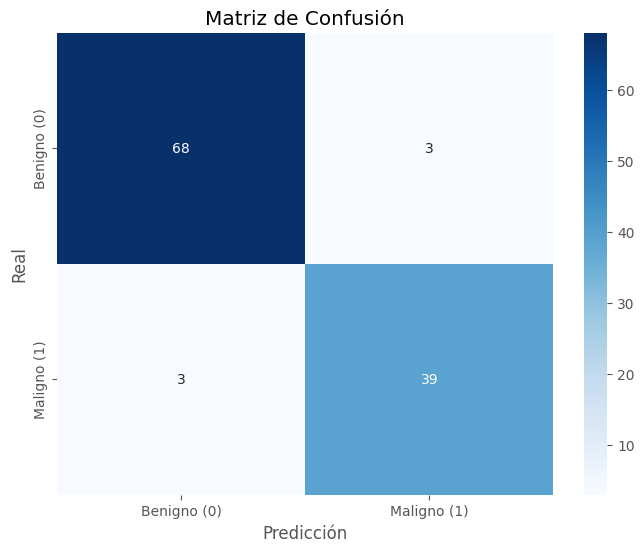

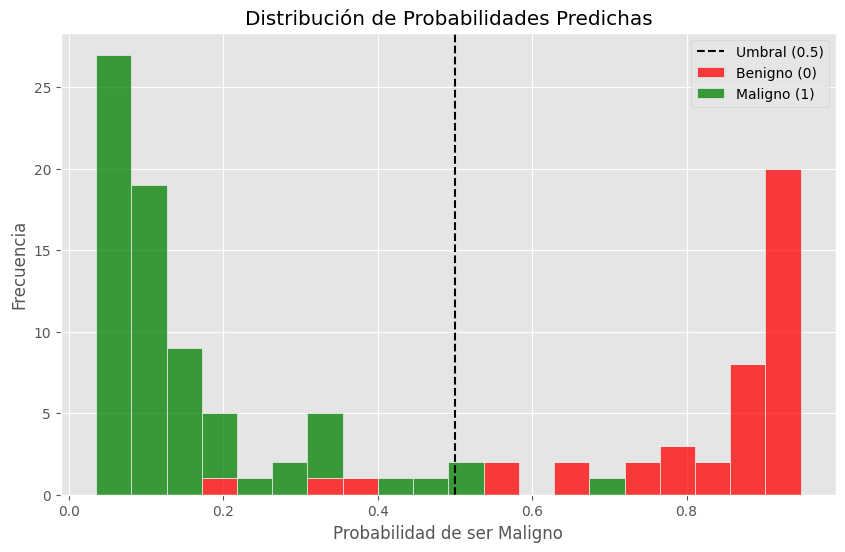


Ejemplos mal clasificados (6 de 113 = 5.3%):
     Probabilidad  Predicción  Real  Correcto
10         0.2103           0     1     False
11         0.3502           0     1     False
100        0.3675           0     1     False
18         0.5148           1     0     False
91         0.5309           1     0     False


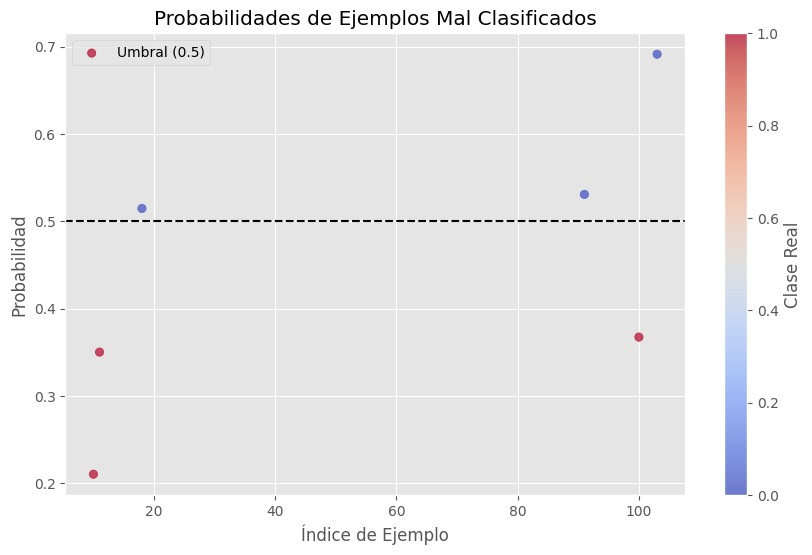


=== Resumen de Evaluación ===
Conjunto de prueba: 113 ejemplos
Ejemplos correctamente clasificados: 107 (94.7%)
Ejemplos incorrectamente clasificados: 6 (5.3%)

Métricas finales:
- Accuracy: 0.9469
- Precision: 0.9286 (de los clasificados como positivos, cuántos son realmente positivos)
- Recall: 0.9286 (de todos los positivos reales, cuántos fueron identificados correctamente)
- F1-Score: 0.9286 (media armónica de precision y recall)

Interpretación:
- Un modelo con alta precision pero bajo recall tiende a perder casos positivos.
- Un modelo con alta recall pero baja precision genera muchos falsos positivos.
- El F1-Score equilibra estas dos métricas y es útil cuando las clases están desbalanceadas.

Distribución detallada:
- Verdaderos Negativos (TN): 68 (predicción=0, real=0)
- Falsos Positivos (FP): 3 (predicción=1, real=0)
- Falsos Negativos (FN): 3 (predicción=0, real=1)
- Verdaderos Positivos (TP): 39 (predicción=1, real=1)

Resultados de evaluación guardados en '../output/mode

In [2]:







## 2. Cargar el modelo entrenado

# Cargar el modelo entrenado
print("Cargando el modelo entrenado...")
model = NeuralNetwork()
model.load('../output/models/trained_model.json')

# Cargar información de entrenamiento
with open('../output/models/training_info.json', 'r') as f:
    training_info = json.load(f)
    
print(f"\nInformación del modelo:")
print(f"Arquitectura: {training_info['input_shape']} inputs, {training_info['hidden_layers']} neuronas por capa oculta, {training_info['output_shape']} outputs")
print(f"Accuracy final en entrenamiento: {training_info['final_train_accuracy']:.4f}")
print(f"Accuracy final en validación: {training_info['final_valid_accuracy']:.4f}")

## 3. Cargar datos de prueba

# Cargar datos de prueba
print("\nCargando datos de prueba...")
test_data = pd.read_csv('../data/processed/test_set_normalized.csv')

# Separar características y etiquetas
X_test = test_data.iloc[:, 1:].values  # Todas las columnas excepto la primera (diagnosis)
y_test = test_data.iloc[:, 0].values.reshape(-1, 1)  # Primera columna (diagnosis)

print(f"Forma de los datos de prueba: X_test {X_test.shape}, y_test {y_test.shape}")

## 4. Realizar predicciones

# Realizar predicciones
print("\nRealizando predicciones...")
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Mostrar algunas predicciones
print("\nAlgunas predicciones (probabilidad y clase predicha):")
pd.set_option('display.precision', 4)
predictions_df = pd.DataFrame({
    'Probabilidad': y_pred_prob.flatten(),
    'Predicción': y_pred.flatten(),
    'Real': y_test.flatten()
})
print(predictions_df.head(10))

## 5. Evaluar el modelo

# Calcular métricas usando nuestras propias funciones
metrics = evaluate_binary_classifier(y_test, y_pred_prob)

print("\n=== Métricas de Evaluación ===")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Loss (Binary Crossentropy): {binary_crossentropy(y_test, y_pred_prob):.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-Score: {metrics['f1_score']:.4f}")

# Visualizar la matriz de confusión
plot_confusion_matrix(y_test, y_pred, 
                      save_path='../output/figures/confusion_matrix.png')

## 6. Visualización de predicciones

# Visualizar distribución de probabilidades
plot_prediction_distribution(y_pred_prob, y_test, 
                            save_path='../output/figures/prediction_distribution.png')

## 7. Análisis de errores

# Crear un DataFrame para visualización
results_df = pd.DataFrame({
    'Probabilidad': y_pred_prob.flatten(),
    'Predicción': y_pred.flatten(),
    'Real': y_test.flatten(),
    'Correcto': y_pred.flatten() == y_test.flatten()
})

# Identificar ejemplos mal clasificados
misclassified = results_df[~results_df['Correcto']].sort_values(by='Probabilidad')
print(f"\nEjemplos mal clasificados ({len(misclassified)} de {len(results_df)} = {len(misclassified)/len(results_df):.1%}):")
print(misclassified.head())

# Visualizar ejemplos mal clasificados
plot_misclassified_examples(y_pred_prob, y_test, y_pred, 
                           save_path='../output/figures/misclassified_examples.png')

## 8. Resumen

cm = metrics['confusion_matrix']
tn, fp = cm[0]
fn, tp = cm[1]

print("\n=== Resumen de Evaluación ===")
print(f"Conjunto de prueba: {len(y_test)} ejemplos")
print(f"Ejemplos correctamente clasificados: {sum(results_df['Correcto'])} ({sum(results_df['Correcto'])/len(results_df):.1%})")
print(f"Ejemplos incorrectamente clasificados: {len(misclassified)} ({len(misclassified)/len(results_df):.1%})")

print("\nMétricas finales:")
print(f"- Accuracy: {metrics['accuracy']:.4f}")
print(f"- Precision: {metrics['precision']:.4f} (de los clasificados como positivos, cuántos son realmente positivos)")
print(f"- Recall: {metrics['recall']:.4f} (de todos los positivos reales, cuántos fueron identificados correctamente)")
print(f"- F1-Score: {metrics['f1_score']:.4f} (media armónica de precision y recall)")

print("\nInterpretación:")
print("- Un modelo con alta precision pero bajo recall tiende a perder casos positivos.")
print("- Un modelo con alta recall pero baja precision genera muchos falsos positivos.")
print("- El F1-Score equilibra estas dos métricas y es útil cuando las clases están desbalanceadas.")

# Mostrar distribución detallada
print("\nDistribución detallada:")
print(f"- Verdaderos Negativos (TN): {tn} (predicción=0, real=0)")
print(f"- Falsos Positivos (FP): {fp} (predicción=1, real=0)")
print(f"- Falsos Negativos (FN): {fn} (predicción=0, real=1)")
print(f"- Verdaderos Positivos (TP): {tp} (predicción=1, real=1)")

# Guardar las métricas en un archivo JSON
evaluation_results = {
    'test_size': int(len(y_test)),
    'accuracy': float(metrics['accuracy']),
    'loss': float(binary_crossentropy(y_test, y_pred_prob)),
    'precision': float(metrics['precision']),
    'recall': float(metrics['recall']),
    'f1_score': float(metrics['f1_score']),
    'confusion_matrix': metrics['confusion_matrix'].tolist(),
    'correct_predictions': int(sum(results_df['Correcto'])),
    'incorrect_predictions': int(len(misclassified))
}

# Crear directorio si no existe
os.makedirs('../output/models', exist_ok=True)

with open('../output/models/evaluation_results.json', 'w') as f:
    json.dump(evaluation_results, f, indent=4)
    
print("\nResultados de evaluación guardados en '../output/models/evaluation_results.json'")